In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing         import *
from sklearn.model_selection       import *
from sklearn.feature_selection     import *
from sklearn.cross_decomposition   import *
from sklearn.neural_network        import *
from sklearn.datasets              import load_iris
from sklearn                       import metrics
from sklearn.neighbors             import KNeighborsClassifier         as KNN
from sklearn.linear_model          import LogisticRegression           as Logistic
from sklearn.ensemble              import RandomForestClassifier       as RFC

plt.style.use('fivethirtyeight') # 制定画风风格
import warnings
warnings.filterwarnings('ignore') #将警告滤掉
%matplotlib inline

pd.set_option('display.float_format', lambda x:'%.6f'% x)
np.set_printoptions(precision = 10, suppress = True)

#箱图分析
#全集，抑郁集，正常集
def boxplot(data_all, depress_col, normal_col):
    f,ax = plt.subplots(3, 1, figsize = (20,18), dpi = 150)
    sns.boxplot(data = data_all, ax = ax[0], orient = 'h')
    ax[0].set_title('All')
    ax[0].set_xticks(range(0,250,10)) 
    ax[0].set_xlim(0,250)
    
    sns.boxplot(data = depress_col, ax = ax[1], orient = 'h')
    ax[1].set_title('Depresstion')
    ax[1].set_xticks(range(0,250,10)) 
    ax[1].set_xlim(0,250)
    
    sns.boxplot(data = normal_col, ax = ax[2], orient = 'h')
    ax[2].set_title('Normal')
    ax[2].set_xticks(range(0,250,10)) 
    ax[2].set_xlim(0,250)
    plt.show()
    

In [2]:
#数据集，最后一列是抑郁症二分类
data = pd.read_csv('C:/Users/XRUI/Desktop/train.csv')
data['y'][data['y'] < 17] = 0
data['y'][data['y'] >= 17] = 1
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x143,x144,x145,x146,x147,x148,x149,x150,x151,y
0,25.300000,14.200000,19.200000,11.400000,64.600000,10.100000,12.500000,6.200000,28.700000,19.800000,...,11.700000,18.300000,13.400000,23.400000,13.500000,29.100000,9.000000,36.800000,13.000000,1
1,57.700000,28.500000,29.200000,16.300000,73.300000,10.100000,11.800000,2.800000,67.200000,28.200000,...,8.600000,52.500000,38.300000,48.600000,26.500000,36.100000,9.200000,44.900000,5.800000,0
2,34.800000,37.200000,51.100000,28.000000,26.000000,15.300000,42.400000,7.000000,35.800000,33.400000,...,12.500000,25.100000,51.300000,85.200000,37.600000,9.000000,9.900000,66.500000,8.700000,0
3,65.100000,37.700000,18.400000,13.200000,83.300000,9.100000,4.100000,1.800000,69.400000,43.500000,...,2.400000,54.500000,22.600000,18.900000,15.500000,76.300000,9.000000,6.800000,3.300000,1
4,37.900000,44.900000,99.100000,28.800000,17.300000,9.100000,66.400000,4.400000,28.500000,50.500000,...,5.900000,22.100000,43.700000,67.700000,23.900000,15.300000,7.500000,69.800000,5.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87.600000,73.800000,109.000000,30.600000,61.600000,22.200000,12.800000,1.900000,91.500000,33.900000,...,4.200000,25.400000,17.400000,29.500000,16.900000,52.700000,9.900000,22.200000,10.100000,0
88,59.200000,41.200000,41.400000,29.400000,56.500000,13.000000,19.000000,7.500000,52.000000,43.300000,...,13.700000,40.500000,42.200000,35.100000,18.500000,29.100000,38.000000,24.900000,4.700000,0
89,66.100000,31.500000,37.100000,14.400000,55.400000,13.700000,26.000000,2.500000,34.300000,21.200000,...,4.500000,21.300000,27.400000,55.400000,18.200000,17.700000,8.700000,66.100000,4.700000,0
90,134.300000,30.600000,31.600000,16.700000,93.700000,2.400000,2.500000,0.700000,89.600000,44.900000,...,3.900000,78.500000,44.300000,34.100000,28.100000,59.500000,5.700000,23.900000,6.500000,0


In [3]:
#抑郁症人和普通人
depress = data[data['y'] == 1]
normal = data[data['y'] == 0]

In [4]:
#抑郁症患者和普通人的各项指标
strings = ['δ', 'θ', 'α', 'β', 'δ-exp', 'θ-exp', 'α-exp', 'β-exp']
depress_col = pd.DataFrame(np.array(depress.iloc[:,0:152:8]).flatten(), columns = ['δ'])
normal_col = pd.DataFrame(np.array(normal.iloc[:,0:152:8]).flatten(), columns = ['δ'])
depress_col['y'] = 1
normal_col['y'] = 0
for i in range(1,8):
    depress_col[strings[i]] = pd.DataFrame(np.array(depress.iloc[:,i:152:8]).flatten(), columns = [strings[i]])
    normal_col[strings[i]] = pd.DataFrame(np.array(normal.iloc[:,i:152:8]).flatten(), columns = [strings[i]])

In [5]:
#数据探索
data_all = pd.concat([normal_col, depress_col], axis = 0)
table_all = data_all.describe([0.1,0.25,0.5,0.75,0.9,0.99])
table_all

,δ,y,θ,α,β,δ-exp,θ-exp,α-exp,β-exp
count,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000
mean,40.875686,0.434783,28.285984,41.029977,21.686556,40.106751,11.245023,35.391018,6.161499
std,30.753103,0.495870,15.182718,19.926594,11.391947,21.526848,5.323213,19.515343,3.731613
min,7.100000,0.000000,5.800000,5.400000,2.700000,2.400000,0.600000,1.300000,0.200000
10%,15.100000,0.000000,12.870000,19.100000,11.270000,14.870000,5.300000,10.370000,2.400000
25%,21.800000,0.000000,18.075000,26.400000,14.200000,22.400000,7.500000,20.275000,3.800000
50%,32.600000,0.000000,25.600000,36.950000,19.100000,36.500000,10.500000,33.400000,5.300000
75%,49.525000,1.000000,34.525000,51.700000,26.125000,53.825000,14.000000,49.100000,7.700000
90%,74.600000,1.000000,45.400000,68.230000,34.230000,73.830000,17.900000,64.130000,10.900000
99%,157.472000,1.000000,76.559000,102.936000,66.083000,91.153000,29.406000,78.518000,21.106000


In [6]:
table_normal = normal_col.describe([0.1,0.25,0.5,0.75,0.9,0.99])
table_normal

,δ,y,θ,α,β,δ-exp,θ-exp,α-exp,β-exp
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,43.002632,0.000000,28.873381,41.915486,22.029555,40.282490,11.594130,35.556781,6.277733
std,33.515512,0.000000,14.662526,19.225488,10.258113,21.525283,5.662404,19.298942,3.837580
min,7.100000,0.000000,6.100000,7.700000,3.000000,2.400000,0.600000,1.300000,0.300000
10%,15.070000,0.000000,13.600000,20.470000,11.700000,15.700000,5.400000,11.600000,2.400000
25%,22.000000,0.000000,19.100000,28.600000,14.700000,22.800000,7.700000,20.075000,3.800000
50%,33.300000,0.000000,26.300000,38.100000,19.850000,37.000000,10.800000,33.500000,5.400000
75%,51.250000,0.000000,34.800000,51.900000,27.100000,53.425000,14.300000,49.325000,7.900000
90%,82.900000,0.000000,45.830000,67.850000,34.330000,73.300000,18.630000,63.930000,11.200000
99%,183.280000,0.000000,77.665000,107.434000,61.117000,93.713000,31.191000,79.200000,21.400000


In [7]:
table_depress = depress_col.describe([0.1,0.25,0.5,0.75,0.9,0.99])
table_depress

,δ,y,θ,α,β,δ-exp,θ-exp,α-exp,β-exp
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,38.110658,1.000000,27.522368,39.878816,21.240658,39.878289,10.791184,35.175526,6.010395
std,26.506375,0.000000,15.810585,20.759100,12.708924,21.540910,4.812844,19.803807,3.586056
min,7.300000,1.000000,5.800000,5.400000,2.700000,4.800000,1.700000,1.700000,0.200000
10%,15.100000,1.000000,12.190000,18.400000,10.400000,14.290000,5.200000,9.290000,2.400000
25%,21.400000,1.000000,17.075000,23.700000,13.300000,21.900000,7.300000,20.375000,3.700000
50%,32.100000,1.000000,24.900000,35.200000,18.000000,36.100000,10.000000,33.000000,5.200000
75%,48.450000,1.000000,33.900000,51.225000,24.700000,54.850000,13.500000,49.025000,7.600000
90%,67.940000,1.000000,45.020000,68.630000,34.200000,74.110000,17.000000,64.410000,10.320000
99%,123.205000,1.000000,73.692000,98.492000,78.392000,88.423000,25.123000,77.841000,19.833000


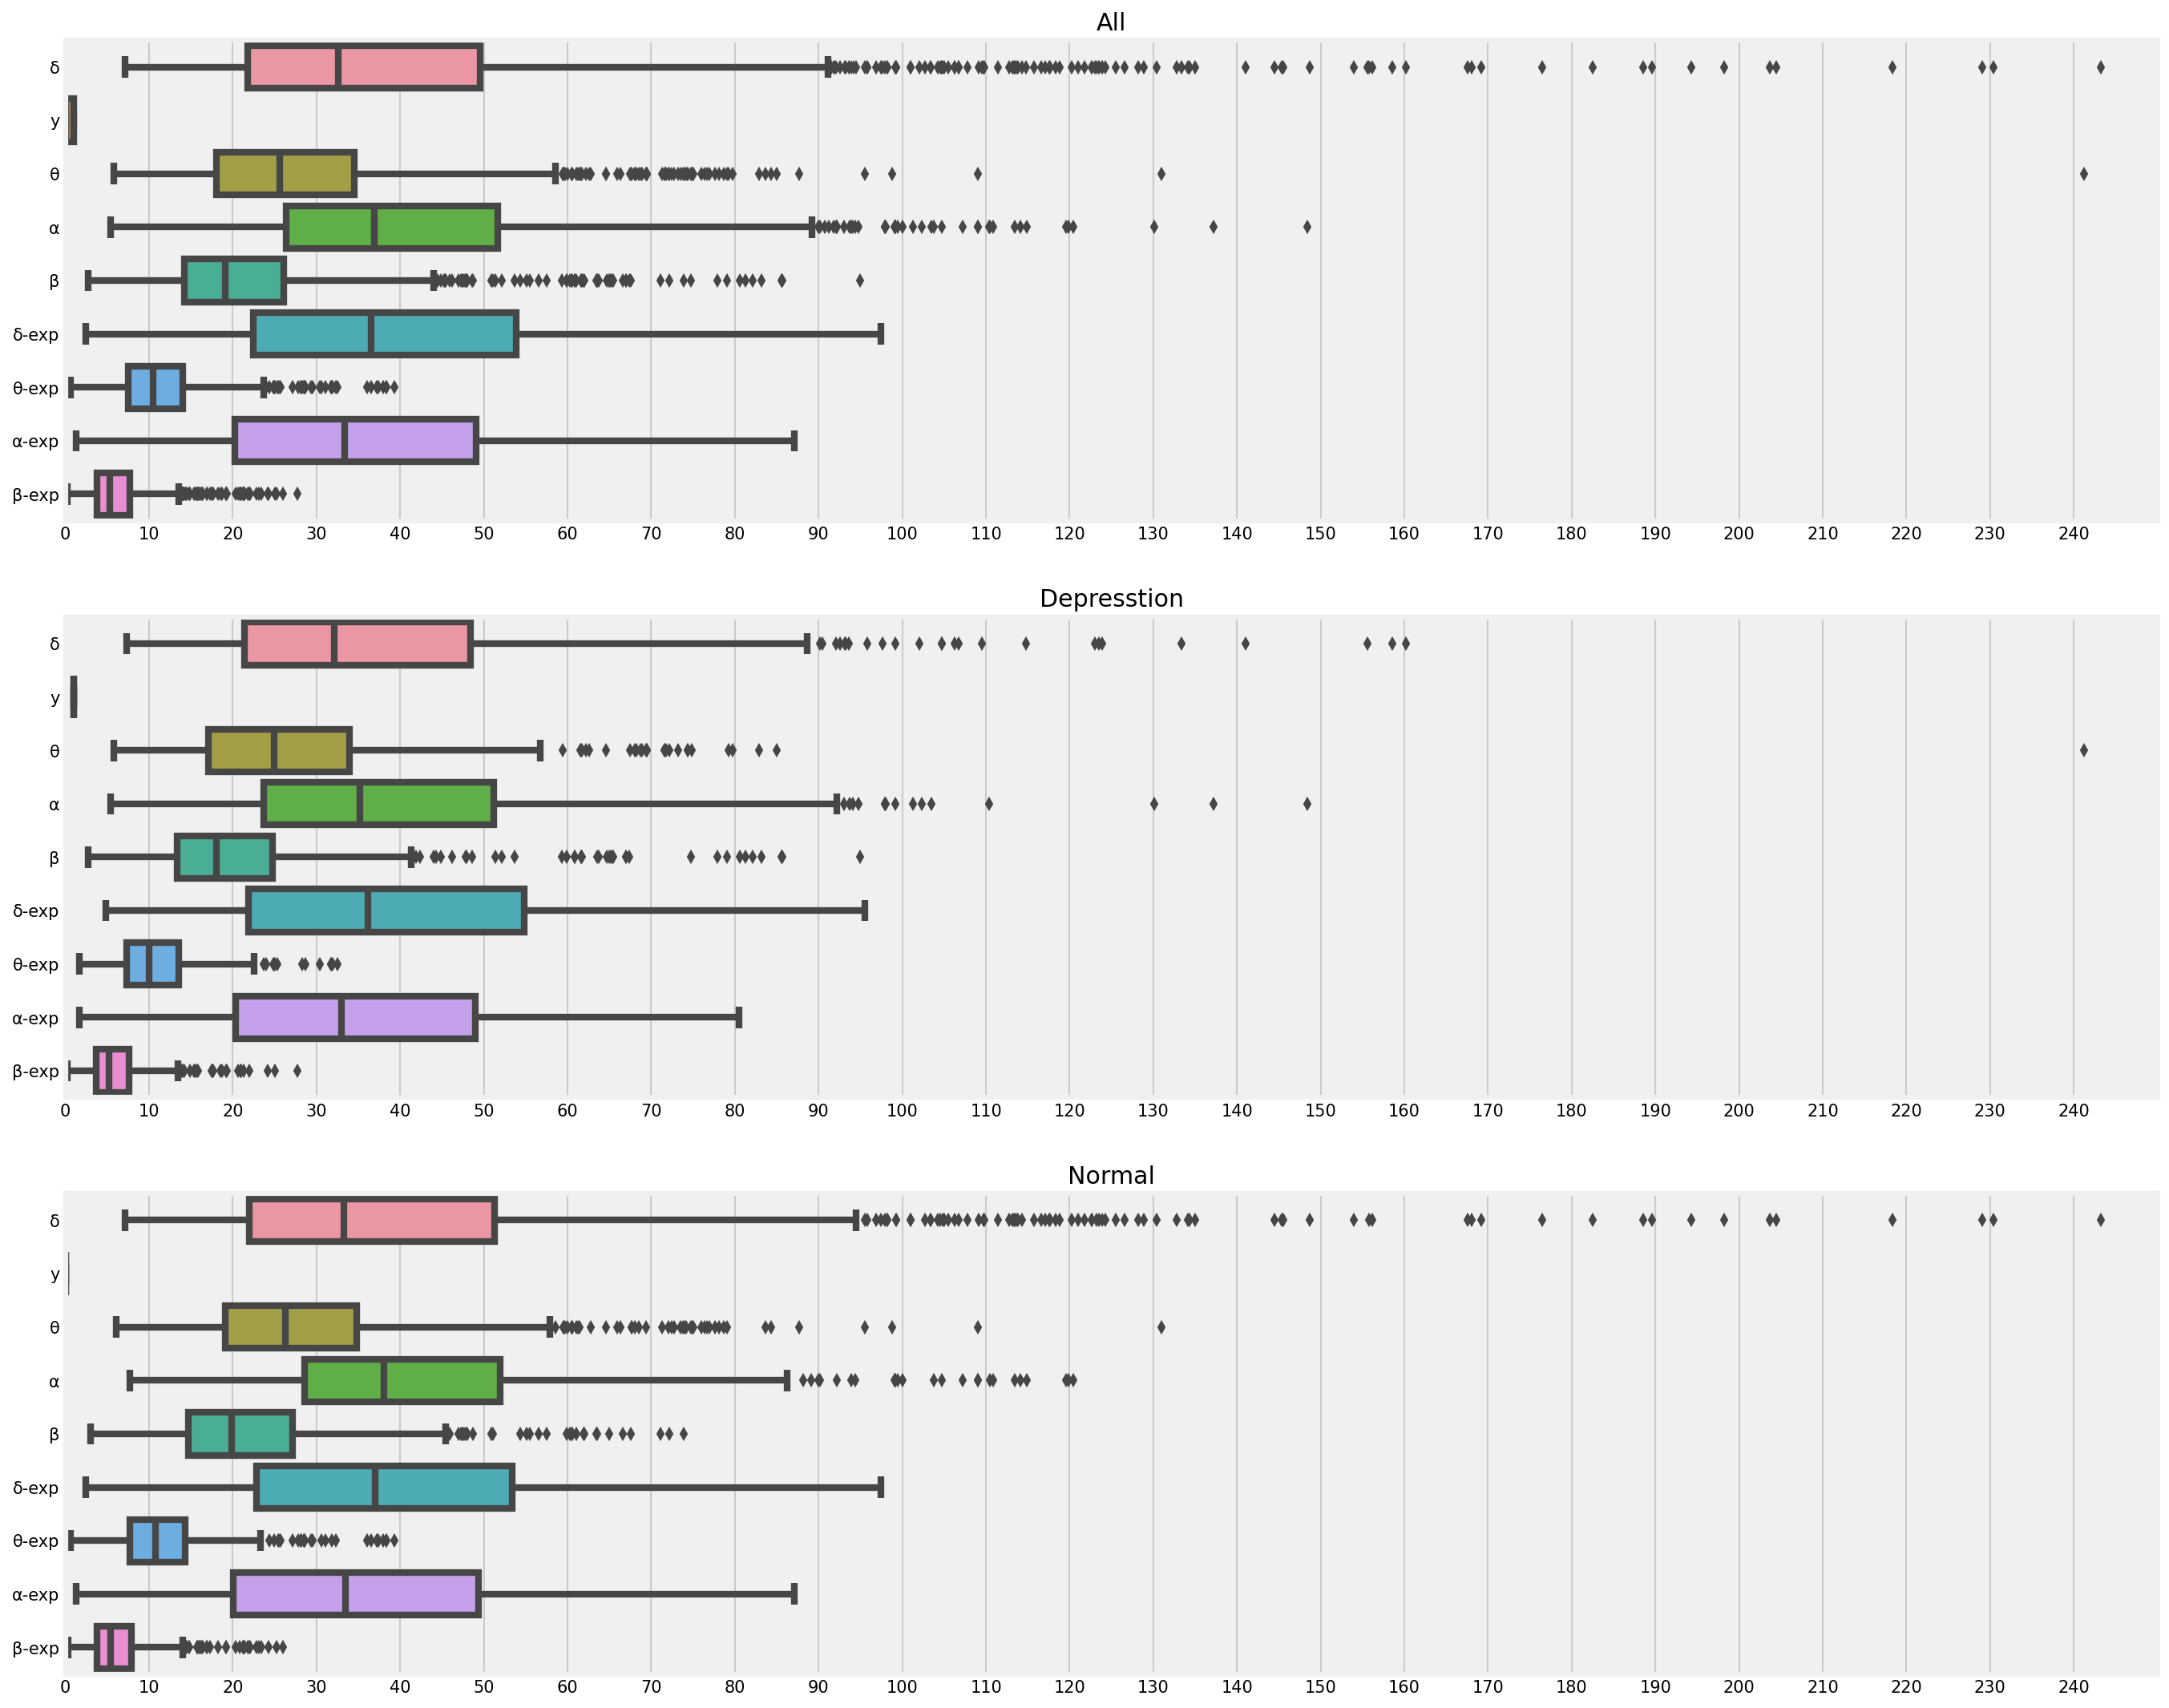

In [8]:
boxplot(data_all, depress_col, normal_col)

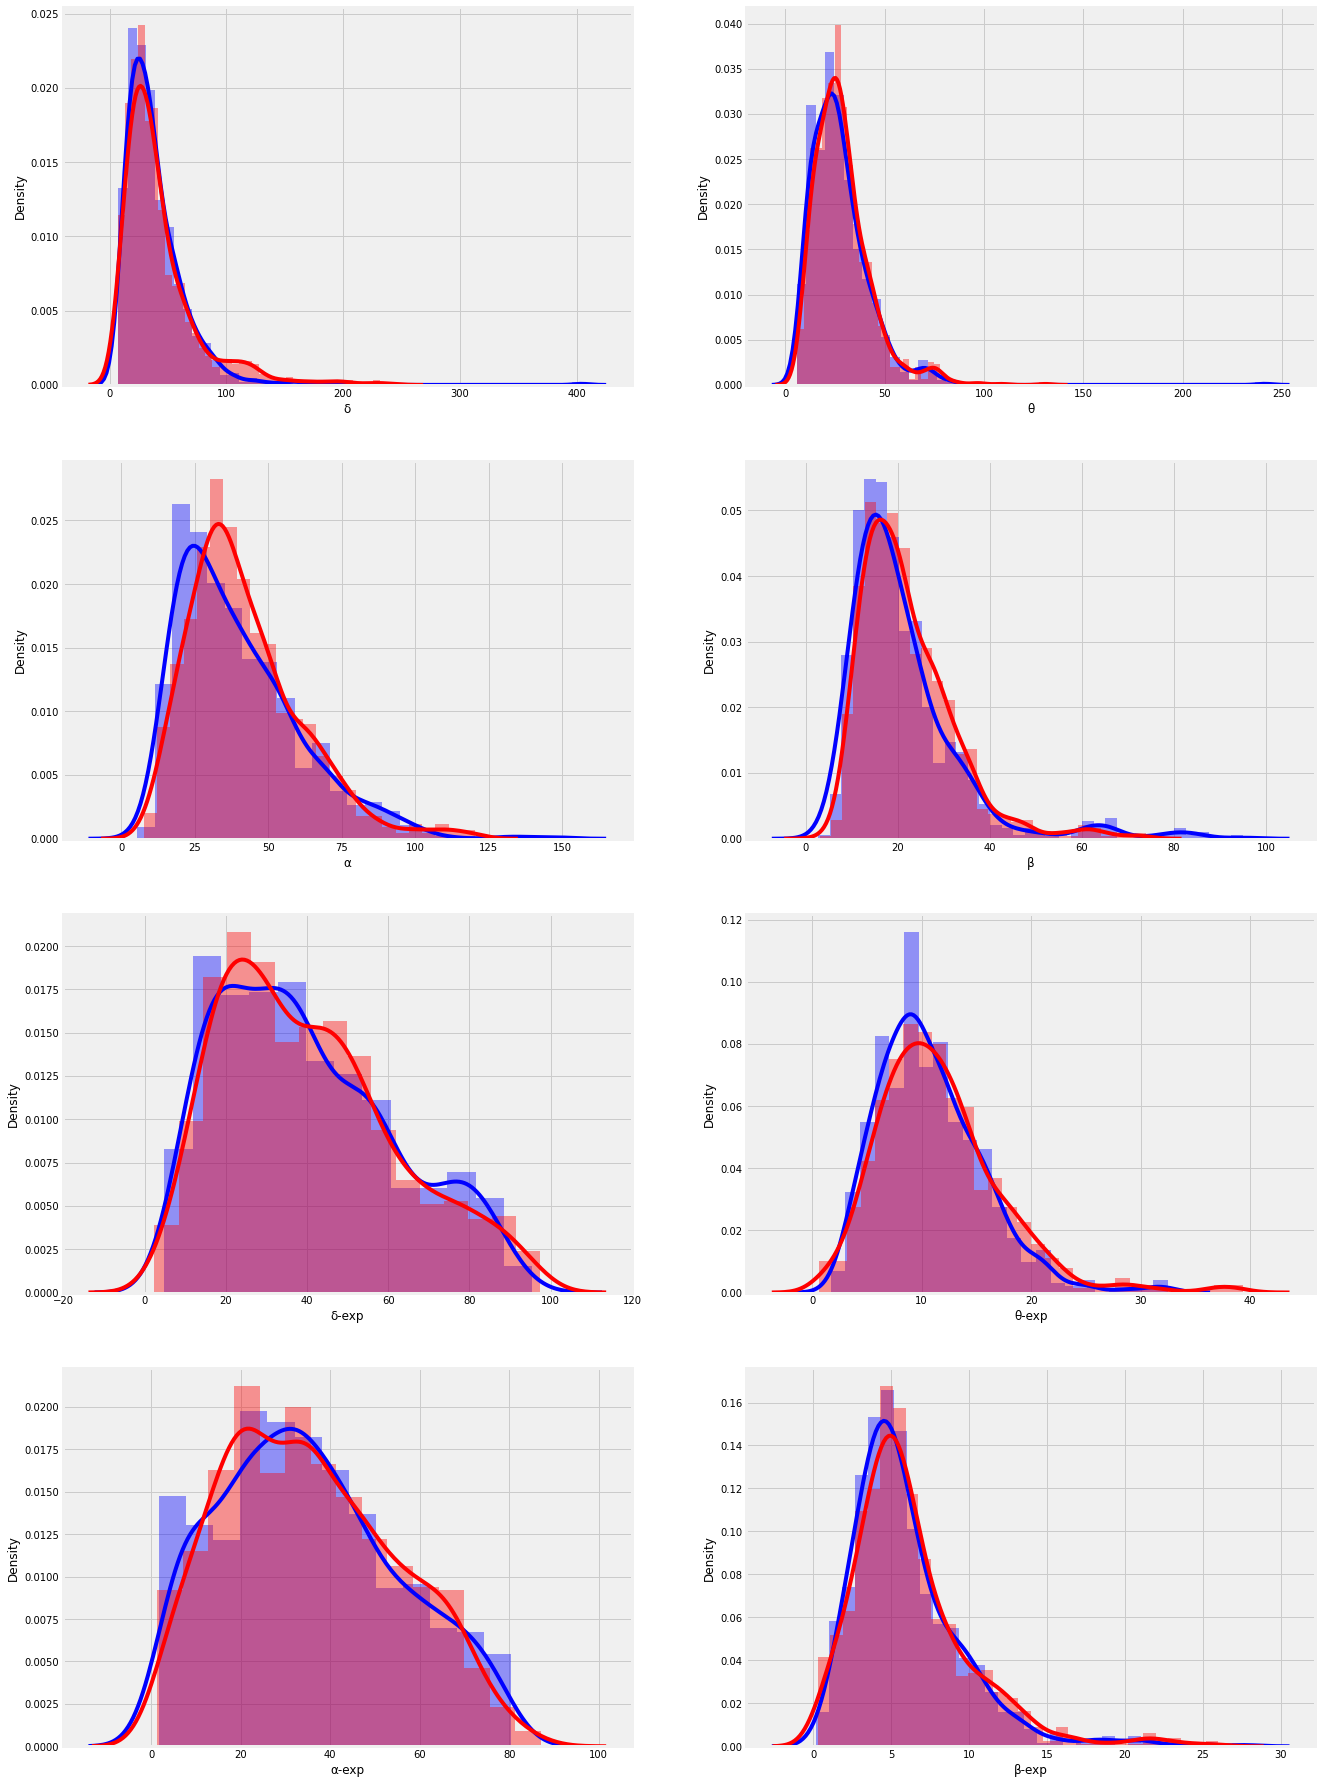

In [9]:
#频率分布直方图分析
f, ax = plt.subplots(4, 2, figsize = (20, 32))
for i in range(8):
    sns.distplot(a = depress_col[strings[i]], hist = True, norm_hist = True, ax = ax.ravel()[i], color = 'b')
    sns.distplot(a = normal_col[strings[i]], hist = True, norm_hist = True, ax = ax.ravel()[i], color = 'r')
plt.show()

In [10]:
#Pearson要求变量服从正态分布
#Spearman不用，用来观察相关性
tttmp = data.corr(method = 'spearman')
tttmp[abs(tttmp) > 0.5]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x143,x144,x145,x146,x147,x148,x149,x150,x151,y
x0,1.000000,0.682627,nan,nan,0.644599,nan,-0.564417,-0.715910,0.847145,0.627566,...,nan,0.572167,nan,nan,nan,nan,nan,nan,nan,nan
x1,0.682627,1.000000,0.672576,0.640709,nan,nan,nan,nan,nan,0.760570,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
x2,nan,0.672576,1.000000,0.771125,nan,nan,nan,nan,nan,0.545951,...,nan,nan,0.529680,0.633256,0.568516,nan,nan,nan,nan,nan
x3,nan,0.640709,0.771125,1.000000,nan,nan,nan,nan,nan,0.506507,...,nan,nan,nan,nan,0.572154,nan,nan,nan,nan,nan
x4,0.644599,nan,nan,nan,1.000000,-0.530425,-0.874911,-0.752537,0.647597,nan,...,nan,nan,nan,nan,nan,0.567435,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x148,nan,nan,nan,nan,0.567435,nan,-0.647436,nan,nan,nan,...,nan,nan,nan,-0.631438,nan,1.000000,nan,-0.891900,nan,nan
x149,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan
x150,nan,nan,nan,nan,nan,nan,0.587759,nan,nan,nan,...,nan,nan,nan,0.752233,nan,-0.891900,nan,1.000000,nan,nan
x151,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.629254,-0.571213,nan,nan,nan,nan,nan,nan,1.000000,nan


In [11]:
#噪声平滑处理，如果超过阈值，那么该噪声数据会被换成这个人这项指标数据的平均值
#一般来说人的脑电波幅在50μV左右，在超过指标+-100时可以认为是噪声而剔除
#每19行数据是一个人
#δ θ α β 感觉这几个指标比较有问题
#前面指标以背景知识为准： δ：0-200μV    θ：5-20μV    α：20-100μV    β：100-150μV
#后面指标以99%分位数为准：91.153000	29.406000	78.518000	21.106000
#90%分位数会让结果变差


y = np.array(data_all['y'])
y_cat = [ y[i] for i in range(0, y.shape[0], 19)]

data_all = np.array(data_all.drop('y', axis = 1))
rows, cols = data_all.shape

std = [200, 120, 100, 150, 91.153000,29.406000,78.518000,21.106000]
for col in range(cols):
    outset = set()
    for row in range(rows):
        if (data_all[row, col] > std[col]):
            outset.add(row)
    for person in range(rows // 19):
        p_set = set(range(person * 19, person * 19 + 18))
        p_normal = p_set - outset
        p_out = p_set - p_normal
        mean = data_all[list(p_normal),col].mean()
        if (np.isnan(mean)):
            pass
        else:
            data_all[list(p_out),col] = mean

data_all = pd.DataFrame(data_all.flatten().reshape(data.shape[0], data.shape[1] - 1))
data_all['y'] = y_cat

In [12]:
data_all.describe()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,y
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,65.491576,34.708504,39.480556,21.192391,58.246332,10.461957,22.095652,3.802174,61.179620,31.931522,...,6.948913,32.655435,26.042391,46.438043,22.040217,30.877174,9.096739,46.695652,6.491304,0.434783
std,39.855604,16.860608,16.820134,11.630712,20.512045,4.777301,15.377334,2.731822,38.667473,14.804424,...,3.299733,21.699726,12.306821,21.020675,10.235406,21.335675,5.064191,21.136791,3.186533,0.498445
min,16.000000,9.100000,12.000000,8.400000,12.600000,2.100000,2.500000,0.400000,10.600000,8.900000,...,0.800000,8.300000,8.100000,11.600000,5.900000,2.400000,1.100000,2.600000,0.900000,0.000000
25%,35.100000,23.600000,28.475000,13.675000,42.625000,6.775000,10.400000,1.800000,29.075000,21.875000,...,4.800000,19.400000,15.825000,29.975000,15.700000,16.125000,5.700000,34.375000,4.400000,0.000000
50%,57.850000,32.050000,36.300000,17.850000,58.050000,9.800000,18.800000,3.200000,57.100000,30.100000,...,6.300000,25.650000,22.500000,44.150000,20.250000,24.550000,8.000000,46.950000,5.800000,0.000000
75%,85.400000,38.900000,47.850000,26.825000,76.100000,13.400000,31.275000,5.200000,83.400000,37.100000,...,8.650000,38.775000,33.125000,61.500000,26.525000,38.900000,11.025000,64.025000,8.625000,1.000000
max,176.500000,95.500000,99.200000,82.100000,89.800000,22.200000,66.400000,17.300000,188.500000,98.800000,...,17.600000,130.400000,67.500000,119.600000,73.900000,91.100000,38.000000,87.100000,14.900000,1.000000


In [13]:
data_all.to_csv('C:/Users/XRUI/Desktop/data_pre.csv', index = False, header = True)

In [14]:
import weka.core.jvm as jvm
import weka.core.converters as converters
from weka.core.converters import *
from weka.attribute_selection import *
import weka.core.packages as packages
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\XRUI\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\XRUI\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\XRUI\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\javabridge\\jars\\cpython.jar', 'c:\\users\\xrui\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\python_weka_wrapper3-0.1.16-py3.9.egg\\weka\\lib\\python-weka-wrapper.jar', 'c:\\users\\xrui\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\python_weka_wrapper3-0.1.16-py3.9.egg\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [15]:
weka_data = converters.load_any_file('C:/Users/XRUI/Desktop/data_pre.csv')
weka_data.class_is_last()

In [19]:
def select_f(n_feature):
    # print(ASSearch(classname="weka.attributeSelection.GreedyStepwise").to_help())
    # print(ASEvaluation(classname="weka.attributeSelection.CfsSubsetEval").to_help())
    search = ASSearch(classname="weka.attributeSelection.GreedyStepwise", options = ['-R' ,'-N', str(n_feature)])
    evaluator = ASEvaluation(classname="weka.attributeSelection.CfsSubsetEval", options=['-P', '5', '-E', '5'])
    attsel = AttributeSelection()
    attsel.search(search)
    attsel.evaluator(evaluator)
    attsel.select_attributes(weka_data)
    
#     print("# attributes: " + str(attsel.number_attributes_selected))
#     print("attributes: " + str(attsel.selected_attributes))
#     print("result string:\n" + attsel.results_string)
    select = set(attsel.selected_attributes) - set([152])
    
    select_feature = data_all[select]
    scaler = MinMaxScaler()
    scaler.fit(select_feature)
    select_feature = pd.DataFrame(scaler.transform(select_feature))
    select_feature['y'] = y_cat
    
    train = select_feature.drop('y', axis = 1)
    test = select_feature['y']
    return train, test

In [20]:
select_f(50)

(         0        1        2        3        4        5        6        7   \
 0  0.398010 0.145540 0.142012 0.193291 0.214683 0.296651 0.319328 0.464286   
 1  0.656716 0.624413 0.390533 0.571885 0.272525 0.540670 0.441176 0.696429   
 2  0.348259 1.000000 0.236686 0.442492 0.462736 0.291866 0.235294 0.303571   
 3  0.368159 0.147105 0.065089 0.210863 0.305895 0.301435 0.298319 0.226190   
 4  0.442786 0.118936 0.112426 0.014377 0.418242 0.167464 0.197479 0.166667   
 ..      ...      ...      ...      ...      ...      ...      ...      ...   
 87 0.398010 0.283255 0.094675 0.680511 0.302558 0.306220 0.306723 0.154762   
 88 0.119403 0.251956 0.082840 0.246006 0.147942 0.224880 0.138655 0.297619   
 89 0.771144 0.489828 0.349112 0.523962 0.255840 0.564593 0.701681 0.339286   
 90 0.432836 0.028169 0.094675 0.065495 0.275862 0.411483 0.663866 0.363095   
 91 0.522388 0.436620 0.272189 0.768371 0.360400 0.564593 0.281513 0.238095   
 
          8        9   ...       40       41      

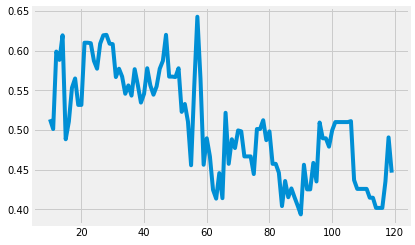

In [32]:
from sklearn.svm import SVC
plty = []
pltx = range(10, 120)

for i in range(10, 120):
    svc = SVC(C = 0.75, kernel = 'poly', degree = i, max_iter = 1000, random_state = 1)
    train, test = select_f(i)
    scores = cross_val_score(svc,train,test,cv = 5, scoring='accuracy')
    plty.append(scores.mean())
plt.plot(pltx, plty)
plt.show()

In [29]:
best_features = np.zeros([120, 60])
for i in range(10, 100):
    train, test = select_f(i)
    for j in range (1,min(30, i)):
        knn = KNN(j)
        scores = cross_val_score(knn,train,test,cv = 5, scoring='accuracy')
        best_features.itemset(i, j, scores.mean())
        
best_features.flatten().max()

0.652046783625731

In [21]:
mlp = MLPClassifier(solver='adam',activation = 'identity', max_iter = 1000, alpha = 1e-5, hidden_layer_sizes = (50,50),
                    random_state = 1)

best_features = np.zeros([120])
for i in range(10, 80):
    train, test = select_f(i)
    scores = cross_val_score(mlp,train,test,cv = 5, scoring='accuracy')
    best_features.itemset(i, scores.mean())
        
best_features

array([0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.          , 0.          ,
       0.          , 0.          , 0.5421052632, 0.6070175439,
       0.6187134503, 0.6070175439, 0.5532163743, 0.5538011696,
       0.5099415205, 0.5099415205, 0.4994152047, 0.5204678363,
       0.5099415205, 0.5099415205, 0.4888888889, 0.4777777778,
       0.4777777778, 0.5415204678, 0.5426900585, 0.5538011696,
       0.5532163743, 0.5532163743, 0.5087719298, 0.4988304094,
       0.5315789474, 0.5321637427, 0.5426900585, 0.5426900585,
       0.5315789474, 0.5865497076, 0.5859649123, 0.5970760234,
       0.6403508772, 0.585380117 , 0.585380117 , 0.5649122807,
       0.5216374269, 0.5315789474, 0.5222222222, 0.5321637427,
       0.5438596491, 0.5760233918, 0.5426900585, 0.5538011696,
       0.5426900585, 0.5421052632, 0.5426900585, 0.5321637427,
       0.5432748538, 0.5754385965, 0.5649122807, 0.5438596491,
       0.5222222222, 0.5333333333, 0.5210526316, 0.5210

In [40]:
from sklearn.svm import SVC
best_features = np.zeros([120,60])
svc = SVC(C = 0.8, kernel = 'rbf', max_iter = 1000, random_state = 1)
for i in range(10, 100):
    train, test = select_f(i)
    scores = cross_val_score(svc,train,test,cv = 5, scoring='accuracy')
    best_features.itemset(i, j, scores.mean())
        
best_features.flatten().max()

0.6403508771929824

In [36]:
strs = r'''[10]  Bhat,  S.,  Acharya,  U.  R.  et  al.  Autism:  cause  factors,  early  diagnosis  and  therapies[J]. 
Reviews in the Neurosciences. 2014, 25: 841-850. 
[11]  Bhat, S., Acharya, U. R. et al. Automated diagnosis of autism: in search of a mathematical 
marker[J]. Reviews in the Neurosciences. 2014, 25: 851-861. 
[12]  Sung,  M.,  Marci,  C.  et  al.  Objective  physiological  and  behavioral  measures  for  identifying 
and  tracking  depression  state  in  clinically  depressed  patients[J].  Massachusetts  Institute  of 
Technology Media Laboratory, Cambridge, MA, Tech. Rep. TR. 2005, 595. 
'''

print(strs.replace('\n', ''))

[10]  Bhat,  S.,  Acharya,  U.  R.  et  al.  Autism:  cause  factors,  early  diagnosis  and  therapies[J]. Reviews in the Neurosciences. 2014, 25: 841-850. [11]  Bhat, S., Acharya, U. R. et al. Automated diagnosis of autism: in search of a mathematical marker[J]. Reviews in the Neurosciences. 2014, 25: 851-861. [12]  Sung,  M.,  Marci,  C.  et  al.  Objective  physiological  and  behavioral  measures  for  identifying and  tracking  depression  state  in  clinically  depressed  patients[J].  Massachusetts  Institute  of Technology Media Laboratory, Cambridge, MA, Tech. Rep. TR. 2005, 595. 
